**Google Drive Mounting**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Path Declaration & Hyper Params Definition**

In [2]:
test_path = "/content/drive/MyDrive/cotton-seed/Data/Test"
train_path = "/content/drive/MyDrive/cotton-seed/Data/Train"

input_size = 64
num_classes = 4
num_epoch = 30
batch_size = 8

**Image Augmentation & Data Labeling**

In [10]:
from keras.preprocessing.image import ImageDataGenerator

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        featurewise_center=True,
        featurewise_std_normalization=True,
        shear_range=0.2,
        zoom_range=0.2,
        zca_whitening=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in
# subfolders of 'Data/Train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        train_path,  # this is the target directory
        target_size=(input_size, input_size),  # all images will be resized to 64 by 64
        batch_size=batch_size,
        class_mode='categorical')

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        test_path,
        target_size=(input_size, input_size),
        batch_size=batch_size,
        class_mode='categorical')

Found 904 images belonging to 4 classes.
Found 125 images belonging to 4 classes.


/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1451: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn(


**Building CNN Model**

In [11]:
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization

model = Sequential()

model.add(Convolution2D(filters = 32, kernel_size = (1, 1), strides = (1,1), input_shape=(input_size, input_size, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(filters = 32, kernel_size = (3, 3), strides = (1,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(filters = 16, kernel_size = (3, 3), strides = (1,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(filters = 8, kernel_size = (5, 5), strides = (1,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = num_classes, activation = 'softmax'))
model.add(Dropout(0.05))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 64, 64, 32)        128       
                                                                 
 batch_normalization_8 (Batc  (None, 64, 64, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_8 (Activation)   (None, 64, 64, 32)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 62, 62, 32)        9248      
                                                                 
 batch_normalization_9 (Batc  (None, 62, 62, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_9 (Activation)   (None, 62, 62, 32)       

**Model Training**

In [12]:
model.compile(loss = 'categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

plot_compare = model.fit_generator(train_generator,
                    epochs = num_epoch, 
                    validation_data=validation_generator)

Epoch 1/30


<ipython-input-12-b925da8aa30a>:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  plot_compare = model.fit_generator(train_generator,


113/113 [==============================] - 7s 31ms/step - loss: 2.2129 - accuracy: 0.3971 - val_loss: 1.2523 - val_accuracy: 0.4000
Epoch 2/30
113/113 [==============================] - 3s 30ms/step - loss: 1.8469 - accuracy: 0.4712 - val_loss: 1.4553 - val_accuracy: 0.4000
Epoch 3/30
113/113 [==============================] - 4s 32ms/step - loss: 1.8542 - accuracy: 0.4967 - val_loss: 1.4697 - val_accuracy: 0.4160
Epoch 4/30
113/113 [==============================] - 3s 28ms/step - loss: 1.7327 - accuracy: 0.5465 - val_loss: 1.2688 - val_accuracy: 0.5040
Epoch 5/30
113/113 [==============================] - 3s 28ms/step - loss: 1.7646 - accuracy: 0.5653 - val_loss: 1.0150 - val_accuracy: 0.5760
Epoch 6/30
113/113 [==============================] - 3s 31ms/step - loss: 1.6708 - accuracy: 0.5962 - val_loss: 1.0598 - val_accuracy: 0.6000
Epoch 7/30
113/113 [==============================] - 3s 30ms/step - loss: 1.4420 - accuracy: 0.6272 - val_loss: 1.0099 - val_accuracy: 0.6400
Epoch 8/30

**Performance Visualization**

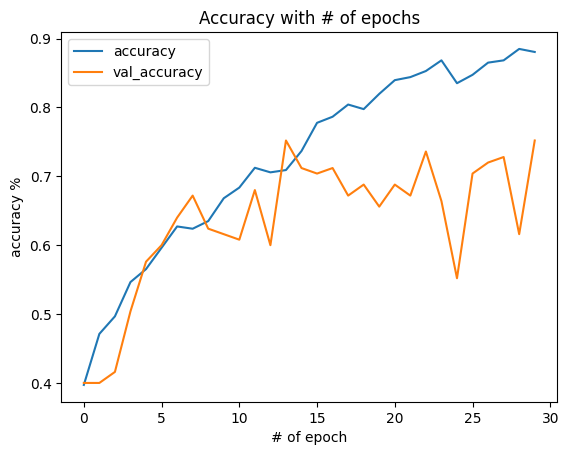

In [13]:
import matplotlib.pyplot as pllt
%matplotlib inline
pllt.plot(plot_compare.history['accuracy'])
pllt.plot(plot_compare.history['val_accuracy'])
pllt.title('Accuracy with # of epochs')
pllt.ylabel('accuracy %')
pllt.xlabel('# of epoch')
pllt.legend(['accuracy', 'val_accuracy'])
pllt.show()

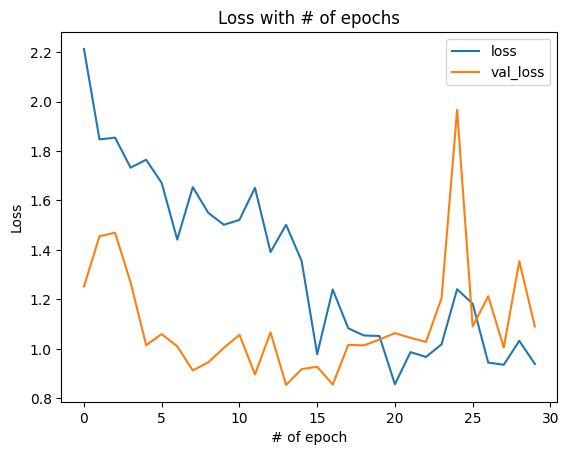

In [14]:
import matplotlib.pyplot as pllt
%matplotlib inline
pllt.plot(plot_compare.history['loss'])
pllt.plot(plot_compare.history['val_loss'])
pllt.title('Loss with # of epochs')
pllt.ylabel('Loss')
pllt.xlabel('# of epoch')
pllt.legend(['loss', 'val_loss'])
pllt.show()